In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from nasbench import api
from random_search import run_random_search, random_spec

In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [3]:
sns.set_theme(style="whitegrid", font_scale=3.)

### Val vs Test accuracy plot (Fig. 3)

In [4]:
# Load saved data
percent_acc = pd.read_csv('outputs/oracle_accuracy.csv')

/home/patara/anaconda3/envs/patara/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


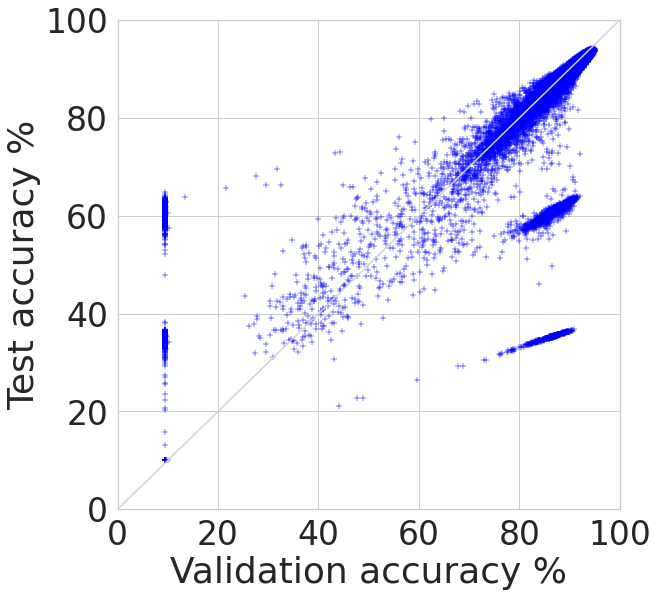

In [5]:
f, ax = plt.subplots(figsize=(9, 9))
g = sns.scatterplot(data=percent_acc, x='validation', y='test', color='#0000FF', ax=ax, marker='+')
g.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgray')
g.set(xlabel='Validation accuracy %', ylabel='Test accuracy %', xlim=[0, 100], ylim=[0, 100])
f.savefig('figures/fig3a.pdf', dpi=96, format='pdf', bbox_inches='tight')

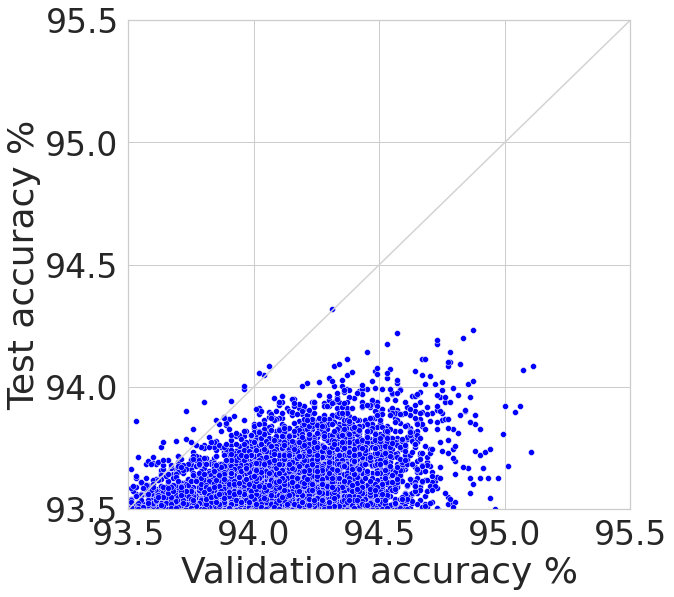

In [6]:
high_acc = percent_acc[percent_acc['validation'] >= 93.5].reset_index(drop=True)

f, ax = plt.subplots(figsize=(9, 9))
g = sns.scatterplot(data=high_acc, x='validation', y='test', color='#0000FF', ax=ax)
g.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgray')
g.set(xlabel='Validation accuracy %', ylabel='Test accuracy %', xlim=[93.5, 95.5], ylim=[93.5, 95.5])
f.savefig('figures/fig3b.pdf', dpi=96, format='pdf', bbox_inches='tight')

### Performance Comparison Plot (Fig. 4)

In [7]:
sns.set_theme(style="darkgrid", font_scale=1.25)

In [8]:
# number of samples vs validation accuracy
random_val_avg_by_samples = np.load('outputs/random_val_avg_by_samples.npy')
random_val_std_by_samples = np.load('outputs/random_val_std_by_samples.npy')

np_val_avg_by_samples = np.load('outputs/np_val_avg_by_samples.npy')
np_val_std_by_samples = np.load('outputs/np_val_std_by_samples.npy')

np2_val_avg_by_samples = np.load('outputs/np2_val_avg_by_samples.npy')
np2_val_std_by_samples = np.load('outputs/np2_val_std_by_samples.npy')

oracle_val_acc = np.load('outputs/oracle_val_acc.npy')
oracle_val_std = np.load('outputs/oracle_val_std.npy')

In [9]:
np_index = [i + 173 for i in range(len(np_val_avg_by_samples))]

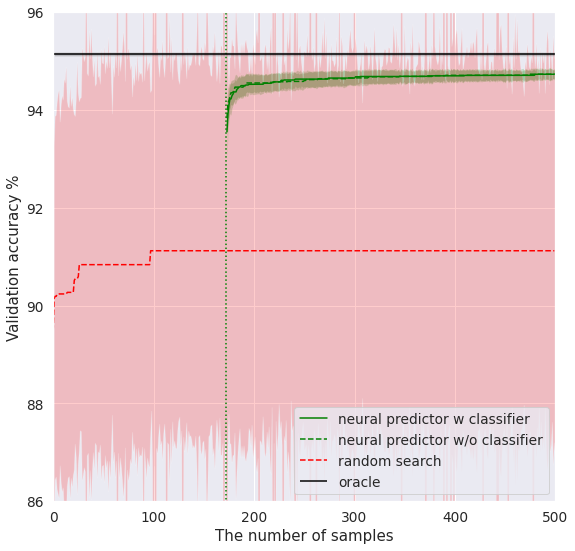

In [10]:
f, ax = plt.subplots(figsize=(9, 9))

# axes settings
ax.set(xlim = [0, 500], ylim = [86, 96], xlabel='The number of samples', ylabel='Validation accuracy %',)

# neural predictor plot
ax.vlines(x=172, ymin=0, ymax=100, colors='green', linestyle='dotted')

plt.plot(np_index, np2_val_avg_by_samples, color='green', label='neural predictor w classifier')
plt.fill_between(range(173, 501), y1=np2_val_avg_by_samples-np2_val_std_by_samples, y2=np2_val_avg_by_samples+np2_val_std_by_samples, facecolor='green', alpha=0.2)

plt.plot(np_index, np_val_avg_by_samples, color='green', label='neural predictor w/o classifier', linestyle='dashed')
plt.fill_between(range(173, 501), y1=np_val_avg_by_samples-np_val_std_by_samples, y2=np_val_avg_by_samples+np_val_std_by_samples, facecolor='green', alpha=0.2)


# random search plot
plt.plot(random_val_avg_by_samples, color='red', label='random search', linestyle='dashed')
plt.fill_between(range(1, 501), y1=random_val_avg_by_samples-random_val_std_by_samples, y2=random_val_avg_by_samples+random_val_std_by_samples, facecolor='red', alpha=0.2)

# oracle line
ax.hlines(y=oracle_val_acc, xmin=0, xmax=500, color='black', label='oracle')
ax.fill_between(range(1, 501), y1=oracle_val_acc-oracle_val_std, y2=oracle_val_acc+oracle_val_std, facecolor='black', alpha=0.2)

# show plot with legend
plt.legend(loc='lower right')
plt.show()

f.savefig('figures/fig4a.pdf', dpi=96, format='pdf', bbox_inches='tight')

In [11]:
# number of samples vs test accuracy
random_test_avg_by_samples = np.load('outputs/random_test_avg_by_samples.npy')
random_test_std_by_samples = np.load('outputs/random_test_std_by_samples.npy')

np_test_avg_by_samples = np.load('outputs/np_test_avg_by_samples.npy')
np_test_std_by_samples = np.load('outputs/np_test_std_by_samples.npy')

np2_test_avg_by_samples = np.load('outputs/np2_test_avg_by_samples.npy')
np2_test_std_by_samples = np.load('outputs/np2_test_std_by_samples.npy')

oracle_test_acc = np.load('outputs/oracle_test_acc.npy')
oracle_test_std = np.load('outputs/oracle_test_std.npy')

In [12]:
np_index = [i + 173 for i in range(len(np_test_avg_by_samples))]

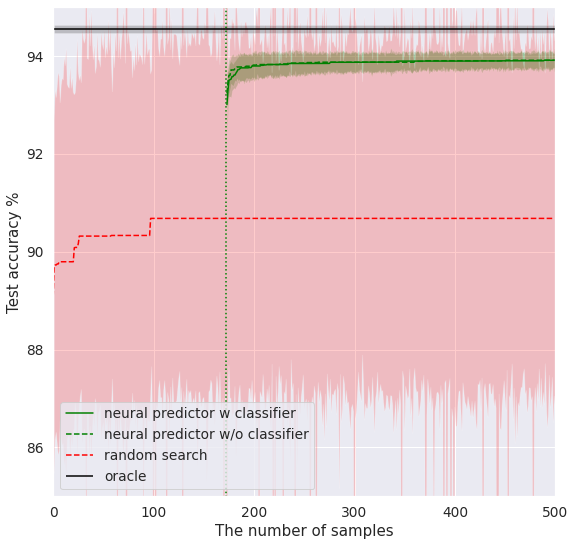

In [13]:
f, ax = plt.subplots(figsize=(9, 9))

# axes settings
ax.set(xlim = [0, 500], ylim = [85, 95], xlabel='The number of samples', ylabel='Test accuracy %',)

# neural predictor plot
ax.vlines(x=172, ymin=0, ymax=100, colors='green', linestyle='dotted')

plt.plot(np_index, np2_test_avg_by_samples, color='green', label='neural predictor w classifier')
plt.fill_between(range(173, 501), y1=np2_test_avg_by_samples-np2_test_std_by_samples, y2=np2_test_avg_by_samples+np2_test_std_by_samples, facecolor='green', alpha=0.2)

plt.plot(np_index, np_test_avg_by_samples, color='green', label='neural predictor w/o classifier', linestyle='dashed')
plt.fill_between(range(173, 501), y1=np_test_avg_by_samples-np_test_std_by_samples, y2=np_test_avg_by_samples+np_test_std_by_samples, facecolor='green', alpha=0.2)


# random search plot
plt.plot(random_test_avg_by_samples, color='red', label='random search', linestyle='dashed')
plt.fill_between(range(1, 501), y1=random_test_avg_by_samples-random_test_std_by_samples, y2=random_test_avg_by_samples+random_test_std_by_samples, facecolor='red', alpha=0.2)

# oracle line
ax.hlines(y=oracle_test_acc, xmin=0, xmax=500, color='black', label='oracle')
ax.fill_between(range(1, 501), y1=oracle_test_acc-oracle_test_std, y2=oracle_test_acc+oracle_test_std, facecolor='black', alpha=0.2)

# show plot with legend
plt.legend(loc='best')
plt.show()

f.savefig('figures/fig4b.pdf', dpi=96, format='pdf', bbox_inches='tight')

In [14]:
# number of samples vs test accuracy
random_test_avg = np.load('outputs/random_test_avg_by_time.npy')
random_test_std = np.load('outputs/random_test_std_by_time.npy')

np_test_avg = np.load('outputs/np_test_avg_by_time.npy')
np_test_std = np.load('outputs/np_test_std_by_time.npy')

np2_test_avg = np.load('outputs/np2_test_avg_by_time.npy')
np2_test_std = np.load('outputs/np2_test_std_by_time.npy')

oracle_test_acc = np.load('outputs/oracle_test_acc.npy')
oracle_test_std = np.load('outputs/oracle_test_std.npy')

In [15]:
np_index = [i + 134 for i in range(len(np_test_avg))]
np2_index = [i + 130 for i in range(len(np2_test_avg))]

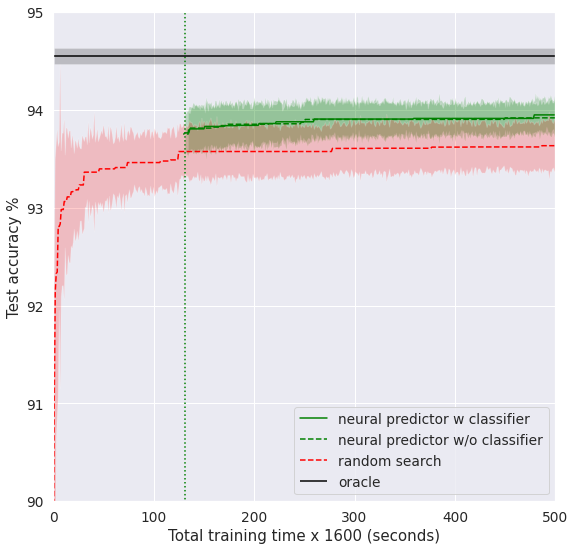

In [16]:
f, ax = plt.subplots(figsize=(9, 9))

# axes settings
ax.set(xlim = [0, 500], ylim = [90., 95.], xlabel='Total training time x 1600 (seconds)', ylabel='Test accuracy %')

# neural predictor plot
ax.vlines(x=131, ymin=0, ymax=100, colors='green', linestyle='dotted')

plt.plot(np2_index, np2_test_avg, color='green', label='neural predictor w classifier')
plt.fill_between(range(131, 501), y1=np2_test_avg-np2_test_std, y2=np2_test_avg+np2_test_std, facecolor='green', alpha=0.2)

plt.plot(np_index, np_test_avg, color='green', label='neural predictor w/o classifier', linestyle='dashed')
plt.fill_between(range(134, 501), y1=np_test_avg-np_test_std, y2=np_test_avg+np_test_std, facecolor='green', alpha=0.2)


# random search plot
plt.plot(random_test_avg, color='red', label='random search', linestyle='dashed')
plt.fill_between(range(1, 501), y1=random_test_avg-random_test_std, y2=random_test_avg+random_test_std, facecolor='red', alpha=0.2)

# oracle line
ax.hlines(y=oracle_test_acc, xmin=0, xmax=500, color='black', label='oracle')
ax.fill_between(range(1, 501), y1=oracle_test_acc-oracle_test_std, y2=oracle_test_acc+oracle_test_std, facecolor='black', alpha=0.2)

# show plot with legend
plt.legend(loc='lower right')
plt.show()

f.savefig('figures/fig4c.pdf', dpi=96, format='pdf', bbox_inches='tight')

### Classifier Filtering (Fig. 6)

In [17]:
from neural_predictor import classifier
from input_preprocessing import preprocess_nasbench
from search_spaces import load_nasbench_101


In [18]:
nasbench = load_nasbench_101()

Loading dataset from file... This may take a few minutes...
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Loaded dataset in 47 seconds


In [19]:
N = 172
def get_N_samples(N):
    models = []

    for _ in range(N):
        while True:
            model = random_spec(nasbench)
            if model not in models:
                models.append(nasbench.query(model))
                break
                
    return preprocess_nasbench(models)

In [20]:
train_clf_data = get_N_samples(N)
clf = classifier([train_clf_data['X'], train_clf_data['norm_A'], train_clf_data['norm_AT']], train_clf_data['labels'])

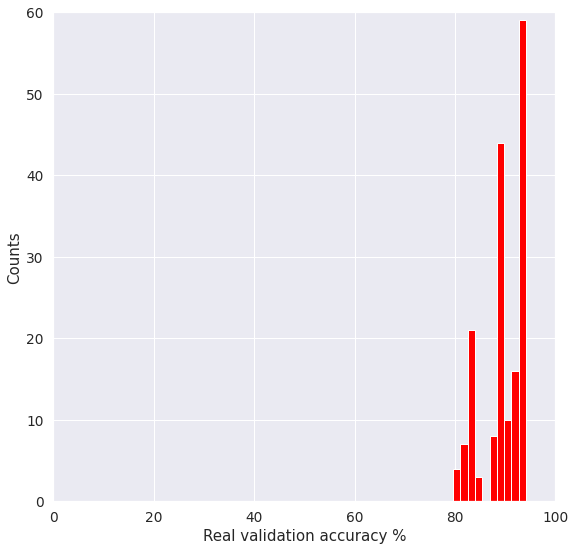

In [21]:
f, ax = plt.subplots(figsize=(9, 9))

# axes settings
ax.set(xlim = [0, 100], ylim=[0, 60], xlabel='Real validation accuracy %', ylabel='Counts')

plt.hist(train_clf_data['val_acc'], color='red', bins=10)

# show plot with legend
plt.show()

f.savefig('figures/fig6a.pdf', dpi=96, format='pdf', bbox_inches='tight')

In [22]:
test_clf_data = get_N_samples(200000)

In [23]:
clf.evaluate([test_clf_data['X'], test_clf_data['norm_A'], test_clf_data['norm_AT']], test_clf_data['labels'])

6250/6250 [==============================] - 24s 4ms/step - loss: 0.2743 - accuracy: 0.9660


[0.27432140707969666, 0.9659649729728699]

In [24]:
y_pred = clf.predict([test_clf_data['X'], test_clf_data['norm_A'], test_clf_data['norm_AT']])

In [25]:
y_pred = np.where(y_pred > 0.5, 1, 0).ravel()

In [26]:
accurate_idx = np.where(y_pred == 1)[0]
inaccurate_idx = np.where(y_pred == 0)[0]

In [27]:
acc_set = test_clf_data['val_acc'][accurate_idx]

In [28]:
inacc_set = test_clf_data['val_acc'][inaccurate_idx]

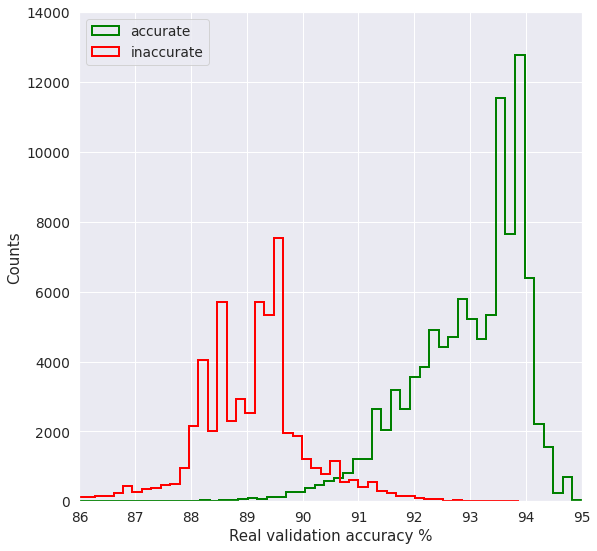

In [29]:
f, ax = plt.subplots(figsize=(9, 9))

# axes settings
ax.set(xlim = [86, 95], ylim=[0, 14000], xlabel='Real validation accuracy %', ylabel='Counts')

plt.hist(acc_set, color='green', histtype='step', bins=500, label='accurate', linewidth=2)
plt.hist(inacc_set, color='red', histtype='step', bins=500, label='inaccurate', linewidth=2)

# show plot with legend
plt.legend(loc='upper left')
plt.show()

f.savefig('figures/fig6b.pdf', dpi=96, format='pdf', bbox_inches='tight')

### Trade-off N vs K (Fig. 7)

In [30]:
oracle_val = np.load('outputs/oracle_val_acc.npy')
oracle_test = np.load('outputs/oracle_test_acc.npy')

In [31]:
random_val = np.load('outputs/random_val_avg_2000.npy')
random_test = np.load('outputs/random_test_avg_2000.npy')

In [32]:
np_samples = np.load('outputs/ablation_study_by_samples.npy', allow_pickle=True).ravel()[0]
np_time = np.load('outputs/ablation_study_by_time.npy', allow_pickle=True).ravel()[0]

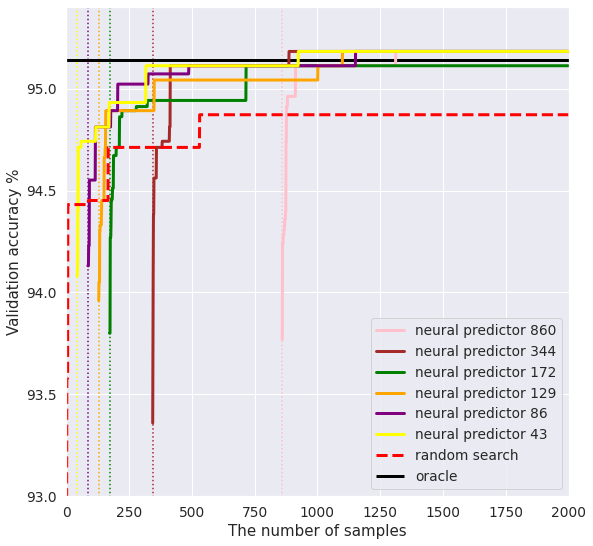

In [33]:
f, ax = plt.subplots(figsize=(9, 9))

# axes settings
ax.set(xlim = [0, 2000], ylim = [93, 95.4], xlabel='The number of samples', ylabel='Validation accuracy %',)

# neural predictor plot
ax.vlines(x=860, ymin=0, ymax=100, colors='pink', linestyle='dotted')
plt.plot([i + 860 for i in range(len(np_samples[860]['np_val_avg']))], np_samples[860]['np_val_avg'], color='pink', label='neural predictor 860', linewidth=3)

ax.vlines(x=344, ymin=0, ymax=100, colors='brown', linestyle='dotted')
plt.plot([i + 344 for i in range(len(np_samples[344]['np_val_avg']))], np_samples[344]['np_val_avg'], color='brown', label='neural predictor 344', linewidth=3)

ax.vlines(x=172, ymin=0, ymax=100, colors='green', linestyle='dotted')
plt.plot([i + 172 for i in range(len(np_samples[172]['np_val_avg']))], np_samples[172]['np_val_avg'], color='green', label='neural predictor 172', linewidth=3)

ax.vlines(x=129, ymin=0, ymax=100, colors='orange', linestyle='dotted')
plt.plot([i + 129 for i in range(len(np_samples[129]['np_val_avg']))], np_samples[129]['np_val_avg'], color='orange', label='neural predictor 129', linewidth=3)

ax.vlines(x=86, ymin=0, ymax=100, colors='purple', linestyle='dotted')
plt.plot([i + 86 for i in range(len(np_samples[86]['np_val_avg']))], np_samples[86]['np_val_avg'], color='purple', label='neural predictor 86', linewidth=3)

ax.vlines(x=43, ymin=0, ymax=100, colors='yellow', linestyle='dotted')
plt.plot([i + 43 for i in range(len(np_samples[43]['np_val_avg']))], np_samples[43]['np_val_avg'], color='yellow', label='neural predictor 43', linewidth=3)


# random search plot
plt.plot(random_val, color='red', label='random search', linestyle='dashed', linewidth=3)

# oracle line
ax.hlines(y=oracle_val, xmin=0, xmax=2000, color='black', label='oracle', linewidth=3)

# show plot with legend
plt.legend(loc='lower right')
plt.show()

f.savefig('figures/fig7a.pdf', dpi=96, format='pdf', bbox_inches='tight')

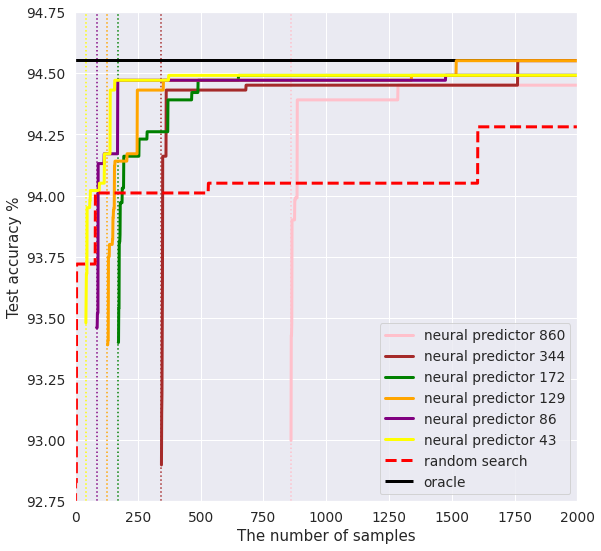

In [34]:
f, ax = plt.subplots(figsize=(9, 9))

# axes settings
ax.set(xlim = [0, 2000], ylim = [92.75, 94.75], xlabel='The number of samples', ylabel='Test accuracy %',)

# neural predictor plot
ax.vlines(x=860, ymin=0, ymax=100, colors='pink', linestyle='dotted')
plt.plot([i + 860 for i in range(len(np_samples[860]['np_test_avg']))], np_samples[860]['np_test_avg'], color='pink', label='neural predictor 860', linewidth=3)

ax.vlines(x=344, ymin=0, ymax=100, colors='brown', linestyle='dotted')
plt.plot([i + 344 for i in range(len(np_samples[344]['np_test_avg']))], np_samples[344]['np_test_avg'], color='brown', label='neural predictor 344', linewidth=3)

ax.vlines(x=172, ymin=0, ymax=100, colors='green', linestyle='dotted')
plt.plot([i + 172 for i in range(len(np_samples[172]['np_test_avg']))], np_samples[172]['np_test_avg'], color='green', label='neural predictor 172', linewidth=3)

ax.vlines(x=129, ymin=0, ymax=100, colors='orange', linestyle='dotted')
plt.plot([i + 129 for i in range(len(np_samples[129]['np_test_avg']))], np_samples[129]['np_test_avg'], color='orange', label='neural predictor 129', linewidth=3)

ax.vlines(x=86, ymin=0, ymax=100, colors='purple', linestyle='dotted')
plt.plot([i + 86 for i in range(len(np_samples[86]['np_test_avg']))], np_samples[86]['np_test_avg'], color='purple', label='neural predictor 86', linewidth=3)

ax.vlines(x=43, ymin=0, ymax=100, colors='yellow', linestyle='dotted')
plt.plot([i + 43 for i in range(len(np_samples[43]['np_test_avg']))], np_samples[43]['np_test_avg'], color='yellow', label='neural predictor 43', linewidth=3)


# random search plot
plt.plot(random_test, color='red', label='random search', linestyle='dashed', linewidth=3)

# oracle line
ax.hlines(y=oracle_test, xmin=0, xmax=2000, color='black', label='oracle', linewidth=3)

# show plot with legend
plt.legend(loc='lower right')
plt.show()

f.savefig('figures/fig7b.pdf', dpi=96, format='pdf', bbox_inches='tight')

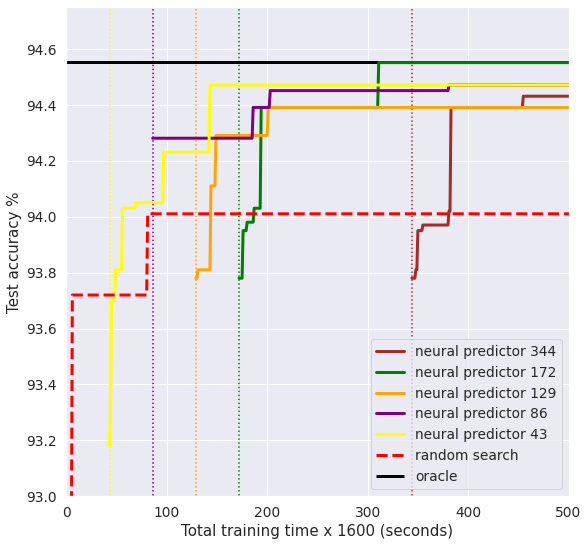

In [35]:
f, ax = plt.subplots(figsize=(9, 9))

# axes settings
ax.set(xlim = [0, 500], ylim = [93, 94.75], xlabel='Total training time x 1600 (seconds)', ylabel='Test accuracy %')

# neural predictor plot
# ax.vlines(x=860, ymin=0, ymax=100, colors='pink', linestyle='dotted')
# plt.plot([i + 860 for i in range(len(np_samples[860]['np_test_avg']))], np_samples[860]['np_test_avg'], color='pink', label='neural predictor 860', linewidth=3)

ax.vlines(x=344, ymin=0, ymax=100, colors='brown', linestyle='dotted')
plt.plot([i + 344 for i in range(len(np_time[344]['np_test_avg']))], np_time[344]['np_test_avg'], color='brown', label='neural predictor 344', linewidth=3)

ax.vlines(x=172, ymin=0, ymax=100, colors='green', linestyle='dotted')
plt.plot([i + 172 for i in range(len(np_time[172]['np_test_avg']))], np_time[172]['np_test_avg'], color='green', label='neural predictor 172', linewidth=3)

ax.vlines(x=129, ymin=0, ymax=100, colors='orange', linestyle='dotted')
plt.plot([i + 129 for i in range(len(np_time[129]['np_test_avg']))], np_time[129]['np_test_avg'], color='orange', label='neural predictor 129', linewidth=3)

ax.vlines(x=86, ymin=0, ymax=100, colors='purple', linestyle='dotted')
plt.plot([i + 86 for i in range(len(np_time[86]['np_test_avg']))], np_time[86]['np_test_avg'], color='purple', label='neural predictor 86', linewidth=3)

ax.vlines(x=43, ymin=0, ymax=100, colors='yellow', linestyle='dotted')
plt.plot([i + 43 for i in range(len(np_time[43]['np_test_avg']))], np_time[43]['np_test_avg'], color='yellow', label='neural predictor 43', linewidth=3)


# random search plot
plt.plot(random_test, color='red', label='random search', linestyle='dashed', linewidth=3)

# oracle line
ax.hlines(y=oracle_test, xmin=0, xmax=2000, color='black', label='oracle', linewidth=3)

# show plot with legend
plt.legend(loc='lower right')
plt.show()

f.savefig('figures/fig7c.pdf', dpi=96, format='pdf', bbox_inches='tight')

### Ablation Study of Neural Predictor under different architectures (Appendix Fig. 1)

In [36]:
# number of samples vs validation accuracy
random_val = np.load('outputs/random_val_avg_2000.npy')
random_test = np.load('outputs/random_test_avg_2000.npy')

np_cnn = np.load('outputs/ablation_study_by_arch_cnn.npy', allow_pickle=True).ravel()[0]
np_mlp = np.load('outputs/ablation_study_by_arch_mlp.npy', allow_pickle=True).ravel()[0]
np_gcn = np.load('outputs/ablation_study_by_arch_gcn.npy', allow_pickle=True).ravel()[0]

oracle_val = np.load('outputs/oracle_val_acc.npy')
oracle_test = np.load('outputs/oracle_test_acc.npy')
oracle_val_std = np.load('outputs/oracle_val_std.npy')
oracle_test_std = np.load('outputs/oracle_test_std.npy')

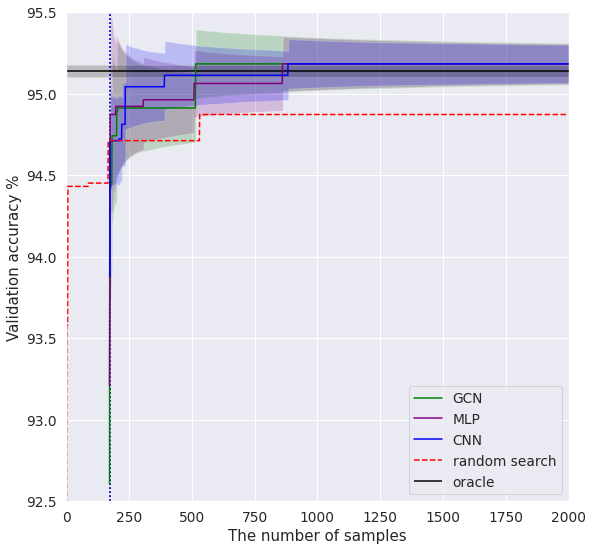

In [37]:
f, ax = plt.subplots(figsize=(9, 9))

# axes settings
ax.set(xlim = [0, 2000], ylim = [92.5, 95.5], xlabel='The number of samples', ylabel='Validation accuracy %',)

# neural predictor plot
ax.vlines(x=172, ymin=0, ymax=100, colors='green', linestyle='dotted')
ax.vlines(x=172, ymin=0, ymax=100, colors='purple', linestyle='dotted')
ax.vlines(x=172, ymin=0, ymax=100, colors='blue', linestyle='dotted')

plt.plot([i + 172 for i in range(len(np_gcn['np_val_avg']))], np_gcn['np_val_avg'], color='green', label='GCN')
plt.fill_between(range(173, 2001), y1=np.array(np_gcn['np_val_avg'])-np.array(np_gcn['np_val_std']), y2=np.array(np_gcn['np_val_avg'])+np.array(np_gcn['np_val_std']), facecolor='green', alpha=0.2)

plt.plot([i + 172 for i in range(len(np_mlp['np_val_avg']))], np_mlp['np_val_avg'], color='purple', label='MLP')
plt.fill_between(range(173, 2001), y1=np.array(np_mlp['np_val_avg'])-np.array(np_mlp['np_val_std']), y2=np.array(np_mlp['np_val_avg'])+np.array(np_mlp['np_val_std']), facecolor='purple', alpha=0.2)

plt.plot([i + 172 for i in range(len(np_cnn['np_val_avg']))], np_cnn['np_val_avg'], color='blue', label='CNN')
plt.fill_between(range(173, 2001), y1=np.array(np_cnn['np_val_avg'])-np.array(np_cnn['np_val_std']), y2=np.array(np_cnn['np_val_avg'])+np.array(np_cnn['np_val_std']), facecolor='blue', alpha=0.2)


# random search plot
plt.plot(random_val, color='red', label='random search', linestyle='dashed')
# plt.fill_between(range(1, 501), y1=random_val-random_std, y2=random_val+random_std, facecolor='red', alpha=0.2)

# oracle line
ax.hlines(y=oracle_val, xmin=0, xmax=2000, color='black', label='oracle')
ax.fill_between(range(1, 2001), y1=oracle_val-oracle_val_std, y2=oracle_val+oracle_val_std, facecolor='black', alpha=0.2)

# show plot with legend
plt.legend(loc='lower right')
plt.show()

f.savefig('figures/figA1a.pdf', dpi=96, format='pdf', bbox_inches='tight')

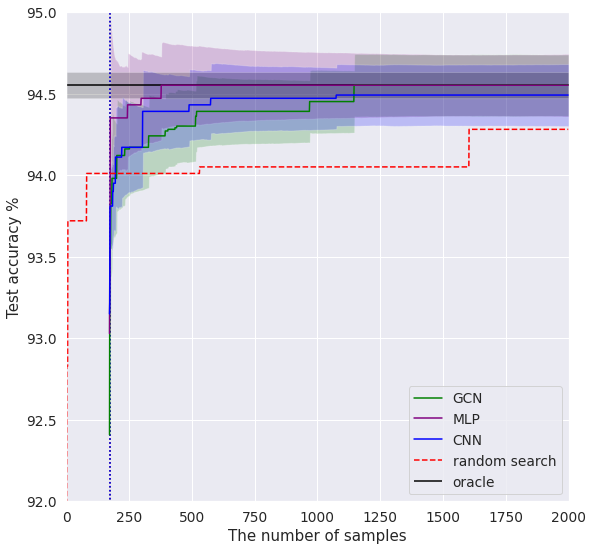

In [38]:
f, ax = plt.subplots(figsize=(9, 9))

# axes settings
ax.set(xlim = [0, 2000], ylim = [92, 95], xlabel='The number of samples', ylabel='Test accuracy %',)

# neural predictor plot
ax.vlines(x=172, ymin=0, ymax=100, colors='green', linestyle='dotted')
ax.vlines(x=172, ymin=0, ymax=100, colors='purple', linestyle='dotted')
ax.vlines(x=172, ymin=0, ymax=100, colors='blue', linestyle='dotted')

plt.plot([i + 172 for i in range(len(np_gcn['np_test_avg']))], np_gcn['np_test_avg'], color='green', label='GCN')
plt.fill_between(range(173, 2001), y1=np.array(np_gcn['np_test_avg'])-np.array(np_gcn['np_test_std']), y2=np.array(np_gcn['np_test_avg'])+np.array(np_gcn['np_test_std']), facecolor='green', alpha=0.2)

plt.plot([i + 172 for i in range(len(np_mlp['np_test_avg']))], np_mlp['np_test_avg'], color='purple', label='MLP')
plt.fill_between(range(173, 2001), y1=np.array(np_mlp['np_test_avg'])-np.array(np_mlp['np_test_std']), y2=np.array(np_mlp['np_test_avg'])+np.array(np_mlp['np_test_std']), facecolor='purple', alpha=0.2)

plt.plot([i + 172 for i in range(len(np_cnn['np_test_avg']))], np_cnn['np_test_avg'], color='blue', label='CNN')
plt.fill_between(range(173, 2001), y1=np.array(np_cnn['np_test_avg'])-np.array(np_cnn['np_test_std']), y2=np.array(np_cnn['np_test_avg'])+np.array(np_cnn['np_test_std']), facecolor='blue', alpha=0.2)


# random search plot
plt.plot(random_test, color='red', label='random search', linestyle='dashed')
# plt.fill_between(range(1, 501), y1=random_test-random_std, y2=random_test+random_std, facecolor='red', alpha=0.2)

# oracle line
ax.hlines(y=oracle_test, xmin=0, xmax=2000, color='black', label='oracle')
ax.fill_between(range(1, 2001), y1=oracle_test-oracle_test_std, y2=oracle_test+oracle_test_std, facecolor='black', alpha=0.2)

# show plot with legend
plt.legend(loc='lower right')
plt.show()

f.savefig('figures/figA1b.pdf', dpi=96, format='pdf', bbox_inches='tight')

In [39]:
np_cnn = np.load('outputs/ablation_study_by_arch_time_cnn.npy', allow_pickle=True).ravel()[0]
np_mlp = np.load('outputs/ablation_study_by_arch_time_mlp.npy', allow_pickle=True).ravel()[0]
np_gcn = np.load('outputs/ablation_study_by_arch_time_gcn.npy', allow_pickle=True).ravel()[0]

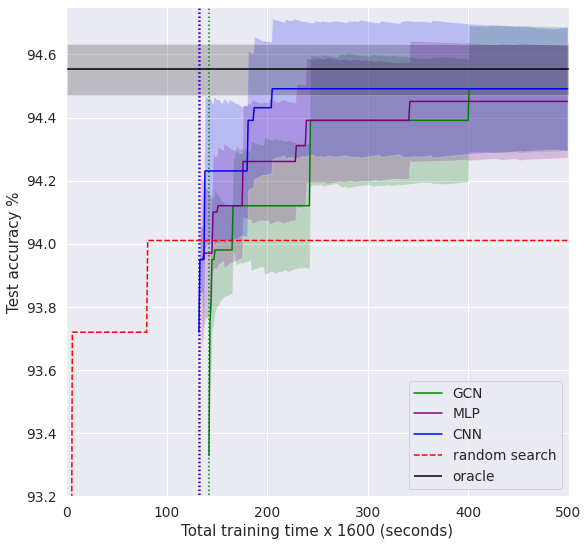

In [40]:
f, ax = plt.subplots(figsize=(9, 9))

# axes settings
ax.set(xlim = [0, 500], ylim = [93.2, 94.75], xlabel='Total training time x 1600 (seconds)', ylabel='Test accuracy %')

# neural predictor plot
ax.vlines(x=500 - len(np_gcn['np_test_avg']), ymin=0, ymax=100, colors='green', linestyle='dotted')
ax.vlines(x=500 - len(np_mlp['np_test_avg']), ymin=0, ymax=100, colors='purple', linestyle='dotted')
ax.vlines(x=500 - len(np_cnn['np_test_avg']), ymin=0, ymax=100, colors='blue', linestyle='dotted')

plt.plot([i + 500 - len(np_gcn['np_test_avg']) for i in range(len(np_gcn['np_test_avg']))], np_gcn['np_test_avg'], color='green', label='GCN')
plt.fill_between(range(500 - len(np_gcn['np_test_avg']), 500), y1=np.array(np_gcn['np_test_avg'])-np.array(np_gcn['np_test_std']), y2=np.array(np_gcn['np_test_avg'])+np.array(np_gcn['np_test_std']), facecolor='green', alpha=0.2)

plt.plot([i + 500 - len(np_mlp['np_test_avg']) for i in range(len(np_mlp['np_test_avg']))], np_mlp['np_test_avg'], color='purple', label='MLP')
plt.fill_between(range(500 - len(np_mlp['np_test_avg']), 500), y1=np.array(np_mlp['np_test_avg'])-np.array(np_mlp['np_test_std']), y2=np.array(np_mlp['np_test_avg'])+np.array(np_mlp['np_test_std']), facecolor='purple', alpha=0.2)

plt.plot([i + 500 - len(np_cnn['np_test_avg']) for i in range(len(np_cnn['np_test_avg']))], np_cnn['np_test_avg'], color='blue', label='CNN')
plt.fill_between(range(500 - len(np_cnn['np_test_avg']), 500), y1=np.array(np_cnn['np_test_avg'])-np.array(np_cnn['np_test_std']), y2=np.array(np_cnn['np_test_avg'])+np.array(np_cnn['np_test_std']), facecolor='blue', alpha=0.2)


# random search plot
plt.plot(random_test, color='red', label='random search', linestyle='dashed')
# plt.fill_between(range(1, 501), y1=random_test-random_std, y2=random_test+random_std, facecolor='red', alpha=0.2)

# oracle line
ax.hlines(y=oracle_test, xmin=0, xmax=500, color='black', label='oracle')
ax.fill_between(range(1, 501), y1=oracle_test-oracle_test_std, y2=oracle_test+oracle_test_std, facecolor='black', alpha=0.2)

# show plot with legend
plt.legend(loc='lower right')
plt.show()

f.savefig('figures/figA1c.pdf', dpi=96, format='pdf', bbox_inches='tight')

### Performance of Neural Predictor (Fig. 9)

In [41]:
models = get_N_samples(119+100000)

In [42]:
# train_models = models[:79]
# valid_models = models[79:119]
# test_models = models[119:]

In [43]:
from neural_predictor import regressor
from scipy.stats import kendalltau as tau
from sklearn.metrics import r2_score, mean_squared_error

reg = regressor([models['X'][:79], models['norm_A'][:79], models['norm_AT'][:79]], models['val_acc'][:79])

In [44]:
sns.set_theme(style="whitegrid")

In [45]:
y_pred = reg.predict([models['X'][:79], models['norm_A'][:79], models['norm_AT'][:79]])
y_true = models['val_acc'][:79]
print(mean_squared_error(y_true, y_pred), tau(y_true, y_pred).correlation, r2_score(y_true, y_pred))

0.7398898778976873 0.789058241179601 0.9490797889015168


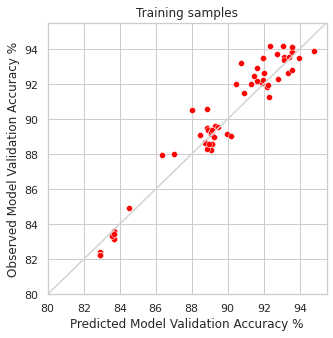

In [46]:
f, ax = plt.subplots(figsize=(5, 5))
g = sns.scatterplot(x=y_pred.ravel(), y=y_true, color='red', ax=ax)
g.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgray')
g.set(xlabel='Predicted Model Validation Accuracy %', ylabel='Observed Model Validation Accuracy %', xlim=[80, 95.5], ylim=[80, 95.5], title='Training samples')
f.savefig('figures/fig9a-nashbench.pdf', dpi=96, format='pdf', bbox_inches='tight')
plt.show()

In [47]:
y_pred = reg.predict([models['X'][79:119], models['norm_A'][79:119], models['norm_AT'][79:119]])
y_true = models['val_acc'][79:119]
print(mean_squared_error(y_true, y_pred), tau(y_true, y_pred).correlation, r2_score(y_true, y_pred))

2.2166369362586495 0.716161010924441 0.8890417226678755


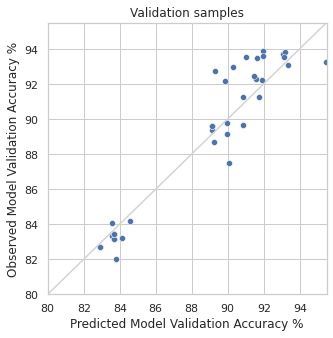

In [48]:
f, ax = plt.subplots(figsize=(5, 5))
g = sns.scatterplot(x=y_pred.ravel(), y=y_true, ax=ax)
g.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgray')
g.set(xlabel='Predicted Model Validation Accuracy %', ylabel='Observed Model Validation Accuracy %', xlim=[80, 95.5], ylim=[80, 95.5], title='Validation samples')
f.savefig('figures/fig9b-nashbench.pdf', dpi=96, format='pdf', bbox_inches='tight')
plt.show()

In [49]:
y_pred = reg.predict([models['X'][119:], models['norm_A'][119:], models['norm_AT'][119:]])
y_true = models['val_acc'][119:]

In [50]:
min_idx = np.argmin(y_pred.ravel())
max_idx = np.argmax(y_pred.ravel())

In [51]:
y_idx = np.where(y_pred > y_pred[min_idx])[0]

In [52]:
y_pred_10 = np.vstack([y_pred[min_idx], y_pred[list(range(0, len(y_idx), len(y_idx) // 8))[-8:]], y_pred[max_idx]]).ravel()
y_true_10 = np.hstack([y_true[min_idx], y_true[list(range(0, len(y_idx), len(y_idx) // 8))[-8:]], y_true[max_idx]]).ravel()
print(mean_squared_error(y_true_10, y_pred_10), tau(y_true_10, y_pred_10).correlation, r2_score(y_true_10, y_pred_10))

3.8588919311700978 0.8666666666666666 0.7839678363322373


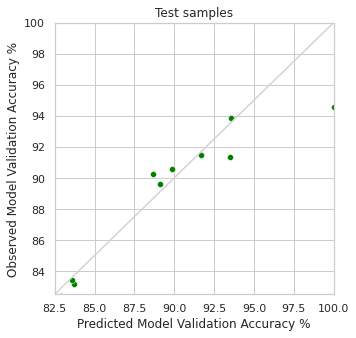

In [53]:
f, ax = plt.subplots(figsize=(5, 5))
g = sns.scatterplot(x=y_pred_10, y=y_true_10, color='green', ax=ax)
g.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgray')
g.set(xlabel='Predicted Model Validation Accuracy %', ylabel='Observed Model Validation Accuracy %', xlim=[82.5, 100], ylim=[82.5, 100], title='Test samples')
f.savefig('figures/fig9c-nashbench.pdf', dpi=96, format='pdf', bbox_inches='tight')
plt.show()

Two-stage Neural Predictor

In [64]:
X_train, A_train, AT_train, y_train = models['X'][:79], models['norm_A'][:79], models['norm_AT'][:79], models['val_acc'][:79]

f_results = clf.predict([X_train, A_train, AT_train])
f_idx = np.where(f_results > 0.5)[0]

reg = regressor([X_train[f_idx], A_train[f_idx], AT_train[f_idx]], y_train[f_idx])

In [65]:
y_pred = reg.predict([X_train[f_idx], A_train[f_idx], AT_train[f_idx]]).ravel()
y_true = y_train[f_idx]

print(mean_squared_error(y_true, y_pred), tau(y_true, y_pred).correlation, r2_score(y_true, y_pred), y_pred.shape)

0.23381989505534762 0.6808790277965172 0.8034071190844819 (38,)


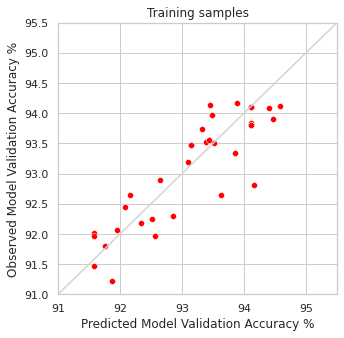

In [66]:
f, ax = plt.subplots(figsize=(5, 5))
g = sns.scatterplot(x=y_pred, y=y_true, color='red', ax=ax)
g.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgray')
g.set(xlabel='Predicted Model Validation Accuracy %', ylabel='Observed Model Validation Accuracy %', xlim=[91, 95.5], ylim=[91, 95.5], title='Training samples')
f.savefig('figures/fig9a-nashbench-two.pdf', dpi=96, format='pdf', bbox_inches='tight')
plt.show()

In [67]:
X_val, A_val, AT_val, y_val = models['X'][79:119], models['norm_A'][79:119], models['norm_AT'][79:119], models['val_acc'][79:119]

f_results = clf.predict([X_val, A_val, AT_val])
f_idx = np.where(f_results > 0.5)[0]

y_pred = reg.predict([X_val[f_idx], A_val[f_idx], AT_val[f_idx]]).ravel()
y_true = y_val[f_idx]
print(mean_squared_error(y_true, y_pred), tau(y_true, y_pred).correlation, r2_score(y_true, y_pred), y_pred.shape)

0.31047919315608397 0.6294117647058822 0.5093294801623401 (19,)


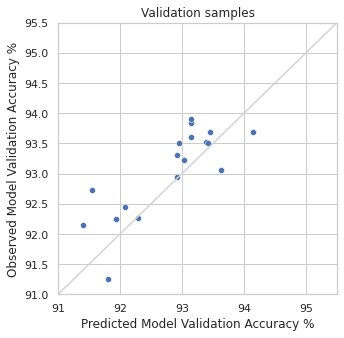

In [68]:
f, ax = plt.subplots(figsize=(5, 5))
g = sns.scatterplot(x=y_pred, y=y_true, ax=ax)
g.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgray')
g.set(xlabel='Predicted Model Validation Accuracy %', ylabel='Observed Model Validation Accuracy %', xlim=[91, 95.5], ylim=[91, 95.5], title='Validation samples')
f.savefig('figures/fig9b-nashbench-two.pdf', dpi=96, format='pdf', bbox_inches='tight')
plt.show()

In [69]:
X_test, A_test, AT_test, y_test = models['X'][119:], models['norm_A'][119:], models['norm_AT'][119:], models['val_acc'][119:]

f_results = clf.predict([X_test, A_test, AT_test])
f_idx = np.where(f_results > 0.5)[0]

y_pred = reg.predict([X_test[f_idx], A_test[f_idx], AT_test[f_idx]]).ravel()
y_true = y_test[f_idx]

In [70]:
min_idx = np.argmin(y_pred.ravel())
max_idx = np.argmax(y_pred.ravel())

In [71]:
y_idx = np.where(y_pred > y_pred[min_idx])[0]

In [72]:
y_pred_10 = np.hstack([y_pred[min_idx], y_pred[list(range(0, len(y_idx), len(y_idx) // 8))[-8:]], y_pred[max_idx]]).ravel()
y_true_10 = np.hstack([y_true[min_idx], y_true[list(range(0, len(y_idx), len(y_idx) // 8))[-8:]], y_true[max_idx]]).ravel()
print(mean_squared_error(y_true_10, y_pred_10), tau(y_true_10, y_pred_10).correlation, r2_score(y_true_10, y_pred_10))

2.1763376889089443 0.6 -0.5676042120787634


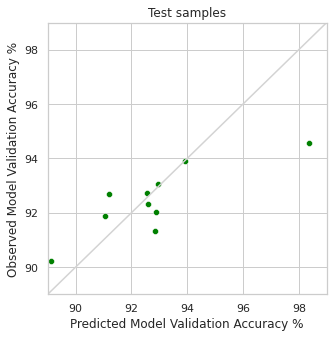

In [77]:
f, ax = plt.subplots(figsize=(5, 5))
g = sns.scatterplot(x=y_pred_10, y=y_true_10, color='green', ax=ax)
g.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgray')
g.set(xlabel='Predicted Model Validation Accuracy %', ylabel='Observed Model Validation Accuracy %', xlim=[89, 99], ylim=[89, 99], title='Test samples')
f.savefig('figures/fig9c-nashbench-two.pdf', dpi=96, format='pdf', bbox_inches='tight')
plt.show()